In [1]:
#TODO: change resampling
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
skin_df = pd.read_csv('DataHAM10000/HAM10000_metadata.csv')
skin_df.dropna(inplace=True)
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [3]:
label_encoder = LabelEncoder()
label_encoder.fit(skin_df['dx'])
skin_df['label'] = label_encoder.transform(skin_df['dx'])
skin_wo_df = skin_df.drop('dx', axis = 1)
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2


In [4]:
#Data visualization

In [5]:
skin_df['dx'].value_counts()

nv       6660
mel      1111
bkl      1089
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

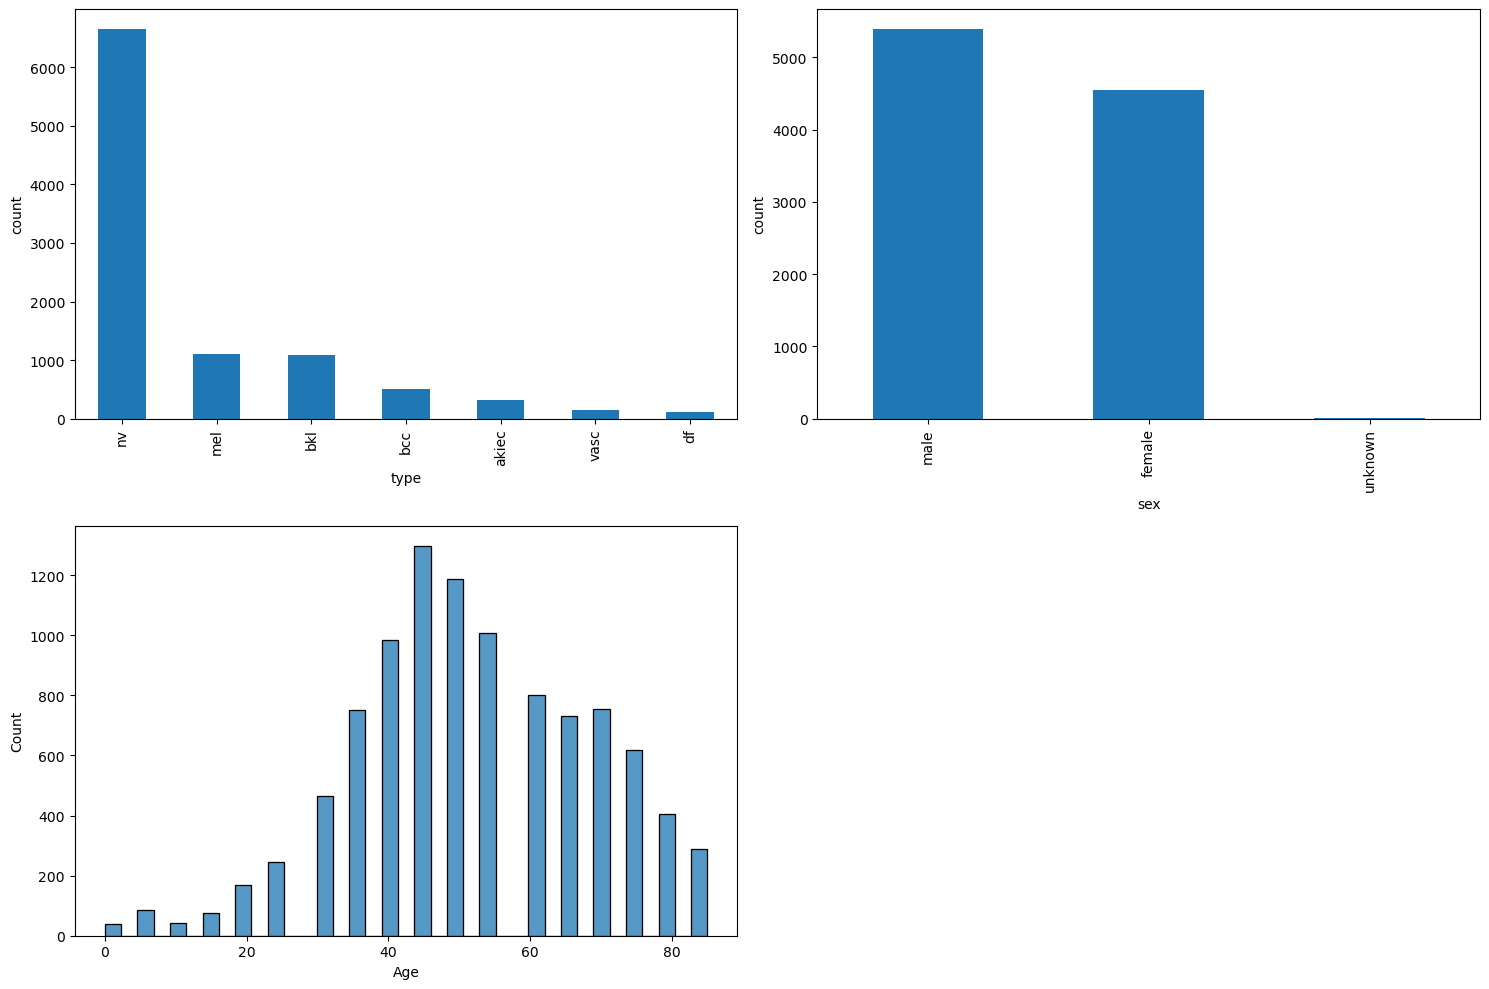

In [6]:
figure = plt.figure(figsize=(15, 10))
ax1 = figure.add_subplot(221)
skin_df['dx'].value_counts().plot(ax=ax1, kind='bar')
ax1.set_xlabel('type')
ax1.set_ylabel('count')

ax2 = figure.add_subplot(222)
skin_df['sex'].value_counts().plot(ax=ax2, kind='bar')
ax2.set_xlabel('sex')
ax2.set_ylabel('count')

ax3 = figure.add_subplot(223)
sns.histplot(x=skin_df['age'])
ax3.set_xlabel('Age')

plt.tight_layout()
plt.show()

In [7]:
#Balance Data by resamping
from sklearn.utils import resample

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]
#Resampling
n_samples = 500
df_0 = resample(df_0, n_samples=n_samples)
df_1 = resample(df_1, n_samples=n_samples)
df_2 = resample(df_2, n_samples=n_samples)
df_3 = resample(df_3, n_samples=n_samples)
df_4 = resample(df_4, n_samples=n_samples)
df_5 = resample(df_5, n_samples=n_samples)
df_6 = resample(df_6, n_samples=n_samples)

new_skin_df = pd.concat([df_0, df_1, df_2, df_3, df_4, df_5, df_6])
print(new_skin_df.shape)
print(new_skin_df.label.value_counts())
new_skin_df.head()

(3500, 8)
0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: label, dtype: int64


,lesion_id,image_id,dx,dx_type,age,sex,localization,label
9952,HAM_0003934,ISIC_0027767,akiec,histo,85.0,male,back,0
9813,HAM_0005264,ISIC_0031659,akiec,histo,45.0,male,back,0
9865,HAM_0005459,ISIC_0032397,akiec,histo,85.0,male,upper extremity,0
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0
10008,HAM_0001576,ISIC_0033705,akiec,histo,60.0,male,face,0


In [8]:
#Read Images
image_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join('DataHAM10000/', '*', '*.jpg'))}

In [9]:
new_skin_df['path'] = skin_df['image_id'].map(image_path.get)
new_skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path
9952,HAM_0003934,ISIC_0027767,akiec,histo,85.0,male,back,0,DataHAM10000\HAM10000_images_part_1\ISIC_00277...
9813,HAM_0005264,ISIC_0031659,akiec,histo,45.0,male,back,0,DataHAM10000\HAM10000_images_part_2\ISIC_00316...
9865,HAM_0005459,ISIC_0032397,akiec,histo,85.0,male,upper extremity,0,DataHAM10000\HAM10000_images_part_2\ISIC_00323...
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,DataHAM10000\HAM10000_images_part_1\ISIC_00278...
10008,HAM_0001576,ISIC_0033705,akiec,histo,60.0,male,face,0,DataHAM10000\HAM10000_images_part_2\ISIC_00337...


In [10]:
from torchvision import transforms

In [11]:
size_of_image = 64
new_skin_df['image'] = new_skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((size_of_image, size_of_image))))

In [12]:
new_skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path,image
9952,HAM_0003934,ISIC_0027767,akiec,histo,85.0,male,back,0,DataHAM10000\HAM10000_images_part_1\ISIC_00277...,"[[[161, 128, 115], [165, 137, 125], [167, 138,..."
9813,HAM_0005264,ISIC_0031659,akiec,histo,45.0,male,back,0,DataHAM10000\HAM10000_images_part_2\ISIC_00316...,"[[[170, 133, 135], [171, 136, 140], [176, 151,..."
9865,HAM_0005459,ISIC_0032397,akiec,histo,85.0,male,upper extremity,0,DataHAM10000\HAM10000_images_part_2\ISIC_00323...,"[[[212, 156, 160], [214, 159, 163], [215, 158,..."
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,DataHAM10000\HAM10000_images_part_1\ISIC_00278...,"[[[197, 141, 171], [204, 148, 174], [201, 142,..."
10008,HAM_0001576,ISIC_0033705,akiec,histo,60.0,male,face,0,DataHAM10000\HAM10000_images_part_2\ISIC_00337...,"[[[193, 154, 173], [173, 127, 140], [170, 130,..."


In [34]:
#Image pixels values to (0, 1)
X = np.asarray(new_skin_df['image'].tolist())/255
Y = new_skin_df.label

In [35]:
#Encoding Y dataset

In [36]:
Y_categorical = pd.get_dummies(Y)
Y_categorical.head()

,0,1,2,3,4,5,6
9952,1,0,0,0,0,0,0
9813,1,0,0,0,0,0,0
9865,1,0,0,0,0,0,0
9758,1,0,0,0,0,0,0
10008,1,0,0,0,0,0,0


In [37]:
np.save('X_preprocessed', X)

In [38]:
np.save('Y_preprocessed', Y_categorical)

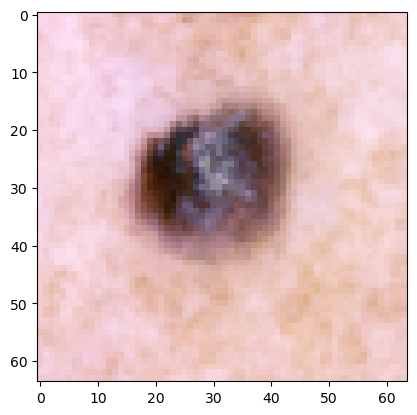

In [42]:
plt.imshow(X[np.random.randint(0, 3500)])